### Registration ID : GO_STP_9654

### Movie Recommendation System using Scikit-Learn Python & Flask | Web Application | Heroku Deployment

Firstly Explain What is a Recommendation System ?  

Create a Content Based Recommender System and Create Web Application in Flask and finally Deploy on Heroku Cloud.

# Business Understanding

Recommender systems are the systems that are designed to recommend things to the user based on many different factors.
These systems predict the most likely product that the users are most likely to purchase and are of interest to.

Netflix, YouTube, Tinder, and Amazon are all examples of recommender systems in use. The systems entice users with relevant
suggestions based on the choices they make. Recommender systems can also enhance experiences for: News Websites. Computer Games.

# Data Collection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('movie_metadata.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(5043, 28)

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


# Data Preparation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
# keep important features which can help to recommend movies, drop others
df= df.drop(['color', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes',
        'actor_1_facebook_likes', 'gross', 
        'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
        'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'], 1)

In [10]:
df.head()

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name
0,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi
1,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport
2,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman
3,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt
4,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN


# Exploratory Data Analysis

<AxesSubplot:>

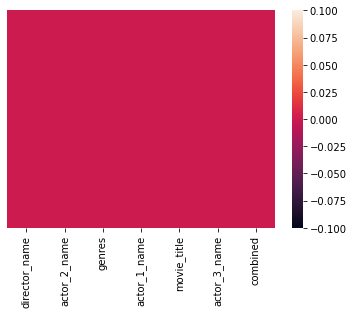

In [46]:
import seaborn as sns

sns.heatmap(df.isnull(), yticklabels=False) # heatmap will represent the correlation

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director_name  4939 non-null   object
 1   actor_2_name   5030 non-null   object
 2   genres         5043 non-null   object
 3   actor_1_name   5036 non-null   object
 4   movie_title    5043 non-null   object
 5   actor_3_name   5020 non-null   object
dtypes: object(6)
memory usage: 236.5+ KB


In [13]:
df.isnull().sum()

director_name    104
actor_2_name      13
genres             0
actor_1_name       7
movie_title        0
actor_3_name      23
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

director_name    0
actor_2_name     0
genres           0
actor_1_name     0
movie_title      0
actor_3_name     0
dtype: int64

In [16]:
## clean genres--- remove | between generes
df['genres'] = df['genres'].apply(lambda a: str(a).replace('|', ' '))
df['genres']

0       Action Adventure Fantasy Sci-Fi
1              Action Adventure Fantasy
2             Action Adventure Thriller
3                       Action Thriller
5               Action Adventure Sci-Fi
                     ...               
5037                       Comedy Drama
5038                       Comedy Drama
5040              Drama Horror Thriller
5041               Comedy Drama Romance
5042                        Documentary
Name: genres, Length: 4919, dtype: object

In [17]:
## clean movie_title --- remove \xa0 in movie_title
df['movie_title'].unique()

array(['Avatar\xa0', "Pirates of the Caribbean: At World's End\xa0",
       'Spectre\xa0', ..., 'A Plague So Pleasant\xa0',
       'Shanghai Calling\xa0', 'My Date with Drew\xa0'], dtype=object)

In [18]:
df['movie_title'] = df['movie_title'].apply(lambda a:a[:-1])

In [19]:
df['movie_title'].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'A Plague So Pleasant', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [20]:
df.tail()

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name
5037,Edward Burns,Caitlin FitzGerald,Comedy Drama,Kerry Bishé,Newlyweds,Daniella Pineda
5038,Scott Smith,Daphne Zuniga,Comedy Drama,Eric Mabius,Signed Sealed Delivered,Crystal Lowe
5040,Benjamin Roberds,Maxwell Moody,Drama Horror Thriller,Eva Boehnke,A Plague So Pleasant,David Chandler
5041,Daniel Hsia,Daniel Henney,Comedy Drama Romance,Alan Ruck,Shanghai Calling,Eliza Coupe
5042,Jon Gunn,Brian Herzlinger,Documentary,John August,My Date with Drew,Jon Gunn


In [21]:
## combined features on which we will calculate cosine similarity
df['combined'] = df['director_name']+' '+df['actor_2_name']+' '+df['genres']+' '+df['actor_1_name']+' '+df['actor_3_name']

In [22]:
df.columns

Index(['director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'combined'],
      dtype='object')

In [23]:
df.head()

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,combined
0,James Cameron,Joel David Moore,Action Adventure Fantasy Sci-Fi,CCH Pounder,Avatar,Wes Studi,James Cameron Joel David Moore Action Adventur...
1,Gore Verbinski,Orlando Bloom,Action Adventure Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,Gore Verbinski Orlando Bloom Action Adventure ...
2,Sam Mendes,Rory Kinnear,Action Adventure Thriller,Christoph Waltz,Spectre,Stephanie Sigman,Sam Mendes Rory Kinnear Action Adventure Thril...
3,Christopher Nolan,Christian Bale,Action Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,Christopher Nolan Christian Bale Action Thrill...
5,Andrew Stanton,Samantha Morton,Action Adventure Sci-Fi,Daryl Sabara,John Carter,Polly Walker,Andrew Stanton Samantha Morton Action Adventur...


# Modelling

In [24]:
# vectorizing and then calculating cosine sim
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()

vec_matrix = vec.fit_transform(df['combined'])

In [25]:
type(vec_matrix)

scipy.sparse.csr.csr_matrix

In [26]:
vec_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vec_matrix)

In [28]:
type(similarity)

numpy.ndarray

In [29]:
similarity

array([[1.        , 0.24174689, 0.16116459, ..., 0.0805823 , 0.        ,
        0.        ],
       [0.24174689, 1.        , 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.16116459, 0.18181818, 1.        , ..., 0.09090909, 0.        ,
        0.        ],
       ...,
       [0.0805823 , 0.        , 0.09090909, ..., 1.        , 0.0836242 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0836242 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [37]:
np.unique(similarity[2], return_counts=True)

(array([0.        , 0.05698029, 0.06286946, 0.06741999, 0.06917145,
        0.07106691, 0.07312724, 0.07537784, 0.07784989, 0.0805823 ,
        0.0836242 , 0.08703883, 0.09090909, 0.09534626, 0.10050378,
        0.10660036, 0.14213381, 0.14625448, 0.15075567, 0.15569979,
        0.16116459, 0.1672484 , 0.17407766, 0.18181818, 0.19069252,
        0.20100756, 0.21320072, 0.21320072, 0.21938173, 0.22613351,
        0.23354968, 0.24174689, 0.2508726 , 0.26111648, 0.27272727,
        0.28603878, 0.32232919, 0.3344968 , 0.34815531, 0.38138504,
        0.63636364, 1.        ]),
 array([2533,    1,    1,    1,    1,    2,    3,   20,   50,   96,  231,
         387,  394,  202,   39,    1,    3,    8,   12,   38,   82,  176,
         208,  179,   43,    2,    1,    1,    2,    8,    8,   37,   53,
          47,   33,    8,    1,    1,    2,    1,    2,    1], dtype=int64))

In [62]:
def recommend1(movie):
    if movie not in df['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i = df.loc[df['movie_title']==movie].index[0]
        lst = list(enumerate(similarity[i]))
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[1:11] # excluding first item since it is the requested movie itself
        l = []
        for i in range(len(lst)):
            a = lst[i][0]
            l.append(df['movie_title'][a])
        plt.bar(l, [i[1] for i in lst])
        plt.xticks(rotation=90)
        plt.xlabel('similar movies to---> '+movie)
        plt.ylabel('cosine scores')
        return l

In [63]:
def recommend(movie):
    if movie not in df['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i = df.loc[df['movie_title']==movie].index[0]
        lst = list(enumerate(similarity[i]))
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[1:11] # excluding first item since it is the requested movie itself
        l = []
        for i in range(len(lst)):
            a = lst[i][0]
            l.append(df['movie_title'][a])
        return l

# Model Evaluation

In [64]:
df['movie_title'].sample(10)

2221                              Eye for an Eye
5007                                Down Terrace
3744    Halloween 4: The Return of Michael Myers
3914                              The Jerky Boys
2937                                      Patton
4491                         You Can Count on Me
1986                                  Straw Dogs
3251                  It's a Wonderful Afterlife
3209                           Cecil B. DeMented
845                             Captain Phillips
Name: movie_title, dtype: object

['The Core',
 'Highlander',
 'The Ice Pirates',
 'Dr. No',
 'Big Mommas: Like Father, Like Son',
 'Runner Runner',
 'Boogie Nights',
 'The Business of Strangers',
 "Marilyn Hotchkiss' Ballroom Dancing and Charm School",
 "Straight A's"]

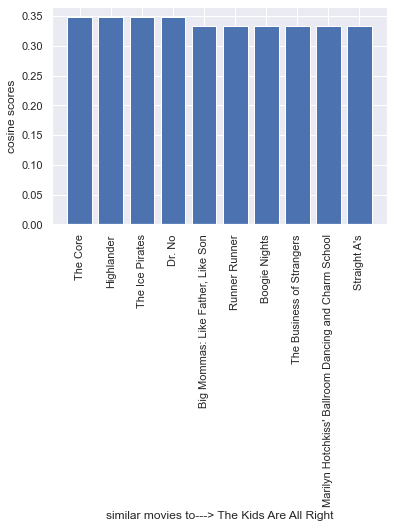

In [65]:
recommend1('The Kids Are All Right')

['Interstellar',
 'X-Men: Apocalypse',
 'Ratatouille',
 'Death Race',
 'Street Fighter',
 'The Intern',
 'Austin Powers: International Man of Mystery',
 'The Usual Suspects',
 'Waterworld',
 'The River Wild']

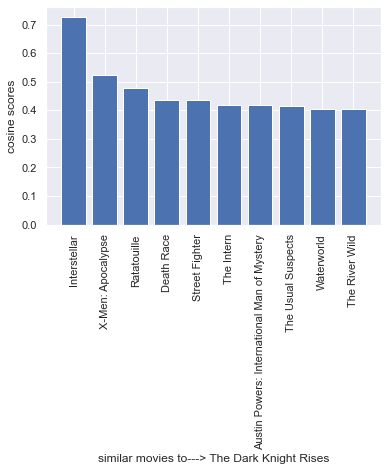

In [66]:
recommend1('The Dark Knight Rises')

['Quantum of Solace',
 'R.I.P.D.',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Avengers',
 'Speed 2: Cruise Control',
 'Ice Age: Continental Drift',
 'Cinderella',
 'The Revenant',
 'Vanity Fair',
 'Iron Man 3']

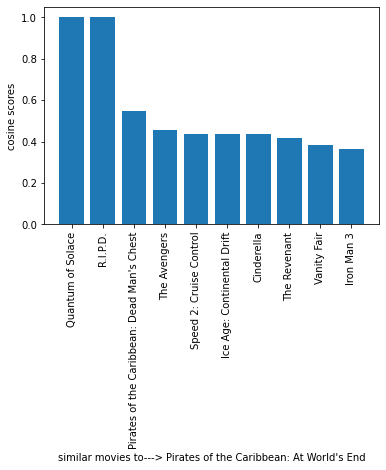

In [45]:
recommend1('Pirates of the Caribbean: At World\'s End')

In [67]:
recommend('The Ice Pirates')

['The Ice Pirates',
 'The Reader',
 'Thomas and the Magic Railroad',
 'Mooz-Lum',
 'The Kids Are All Right',
 'The Jerky Boys',
 'Glory',
 'Jungle Shuffle',
 'Area 51',
 'The Misfits']

In [69]:
from Movie_Recommendation_System import recommend

recommend('The Ice Pirates')

['The Ice Pirates',
 'The Reader',
 'Thomas and the Magic Railroad',
 'Mooz-Lum',
 'The Kids Are All Right',
 'The Jerky Boys',
 'Glory',
 'Jungle Shuffle',
 'Area 51',
 'The Misfits']